#*EXTRACTING DATA*

In [1]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/" "https://datahack-prod.s3.amazonaws.com/train_file/train.csv_VsW9EGx.zip" -c -O 'train.csv_VsW9EGx.zip'

--2020-09-20 14:18:41--  https://datahack-prod.s3.amazonaws.com/train_file/train.csv_VsW9EGx.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.116
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4667725 (4.5M) [application/zip]
Saving to: ‘train.csv_VsW9EGx.zip’

train.csv_VsW9EGx.z 100%[===================>]   4.45M  2.33MB/s    in 1.9s    

2020-09-20 14:18:44 (2.33 MB/s) - ‘train.csv_VsW9EGx.zip’ saved [4667725/4667725]



In [2]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/" "https://datahack-prod.s3.amazonaws.com/test_file/test.csv_yAFwdy2.zip" -c -O 'test.csv_yAFwdy2.zip'

--2020-09-20 14:18:44--  https://datahack-prod.s3.amazonaws.com/test_file/test.csv_yAFwdy2.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.116
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1539177 (1.5M) [application/zip]
Saving to: ‘test.csv_yAFwdy2.zip’

test.csv_yAFwdy2.zi 100%[===================>]   1.47M  1.04MB/s    in 1.4s    

2020-09-20 14:18:46 (1.04 MB/s) - ‘test.csv_yAFwdy2.zip’ saved [1539177/1539177]



In [3]:
!unzip 'train.csv_VsW9EGx.zip'
!unzip 'test.csv_yAFwdy2.zip'

Archive:  train.csv_VsW9EGx.zip
  inflating: train.csv               
Archive:  test.csv_yAFwdy2.zip
  inflating: test.csv                


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import *
from sklearn.decomposition import *

!pip install lightgbm
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 66.1MB 86kB/s 


In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#*DATA ANALYSIS AND FEATURE ENGINEERING*

In [106]:
full_df = pd.concat([train, test]).reset_index(drop=True)

In [107]:
full_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


In [108]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 46.5+ MB


In [109]:
categorical_columns = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
target = 'Response'

for col in categorical_columns:
  print(col)
  print(f'NUNIUQE: {full_df[col].nunique()}')
  print(f'UNIUQE: {full_df[col].unique()}')
  print('--'*40)

Gender
NUNIUQE: 2
UNIUQE: ['Male' 'Female']
--------------------------------------------------------------------------------
Driving_License
NUNIUQE: 2
UNIUQE: [1 0]
--------------------------------------------------------------------------------
Region_Code
NUNIUQE: 53
UNIUQE: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
--------------------------------------------------------------------------------
Previously_Insured
NUNIUQE: 2
UNIUQE: [0 1]
--------------------------------------------------------------------------------
Vehicle_Age
NUNIUQE: 3
UNIUQE: ['> 2 Years' '1-2 Year' '< 1 Year']
--------------------------------------------------------------------------------
Vehicle_Damage
NUNIUQE: 2
UNIUQE: ['Yes' 'No']
--------------------------------------------------------------------------------
Policy_Sales_Channel
NU

In [110]:
# ENCODING

string_cat_cols = ['Gender', 'Vehicle_Damage']

for col in string_cat_cols:
  full_df[col] = LabelEncoder().fit_transform(full_df[col])

def VehicleAge(age):
  if age == '< 1 Year':
    return 0
  elif age == '1-2 Year':
    return 1
  else:
   return 2

full_df['Vehicle_Age'] = full_df['Vehicle_Age'].apply(VehicleAge)

In [111]:
full_df[categorical_columns] = full_df[categorical_columns].astype(int)
full_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [112]:
# VALUE COUNTS

for col in categorical_columns:
  print(col)
  print(f'{full_df[col].value_counts()}')
  print('--'*40)

Gender
1    274325
0    233821
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
Driving_License
1    507097
0      1049
Name: Driving_License, dtype: int64
--------------------------------------------------------------------------------
Region_Code
28    141937
8      44900
46     26357
41     24400
15     17750
30     16276
29     14843
50     13657
3      12349
11     12328
36     11696
33     10307
47      9942
35      9309
6       8351
45      7543
37      7343
18      6903
48      6274
14      6249
39      6138
10      5847
21      5671
2       5398
13      5396
7       4313
12      4235
9       4084
32      3745
27      3711
43      3508
26      3461
17      3455
25      3352
24      3263
16      2727
0       2699
38      2677
31      2635
23      2596
20      2528
49      2388
4       2379
34      2190
19      2059
22      1729
40      1708
5       1698
1       1363
44      1064
42       787
52       357
51       271
Nam

In [113]:
low_count_index = full_df['Policy_Sales_Channel'].value_counts()[full_df['Policy_Sales_Channel'].value_counts() <= 3].index
full_df['Policy_Sales_Channel'] = full_df['Policy_Sales_Channel'].apply(lambda pcs: min(low_count_index) if pcs in low_count_index else pcs)

20
85


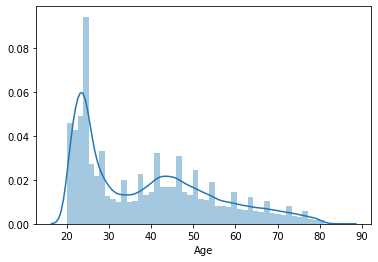

In [114]:
print(min(full_df['Age']))
print(max(full_df['Age']))

full_df['Age_Bins'] = full_df['Age']
def bin(age):
  if age in range(20,41):
    return 0
  elif age in range(41,61):
    return 1
  else:
    return 2
full_df['Age_Bins'] = full_df['Age_Bins'].apply(bin)

sns.distplot(full_df['Age'])

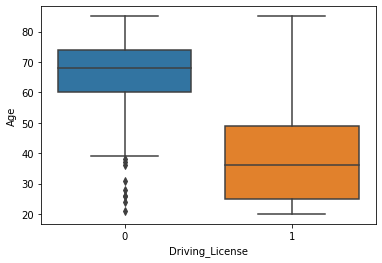

In [115]:
sns.boxplot(x=full_df.Driving_License, y=full_df.Age)

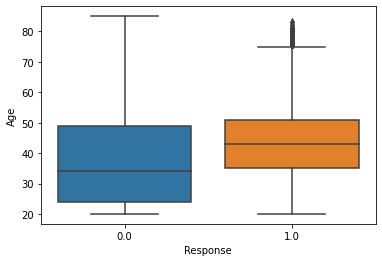

In [116]:
sns.boxplot(x=full_df.Response, y=full_df.Age)

In [117]:
print(full_df[full_df.Vehicle_Age == 0]['Previously_Insured'].value_counts())
print(full_df[full_df.Vehicle_Age == 1]['Previously_Insured'].value_counts())
print(full_df[full_df.Vehicle_Age == 2]['Previously_Insured'].value_counts())

1    145944
0     73861
Name: Previously_Insured, dtype: int64
0    179945
1     87070
Name: Previously_Insured, dtype: int64
0    21270
1       56
Name: Previously_Insured, dtype: int64


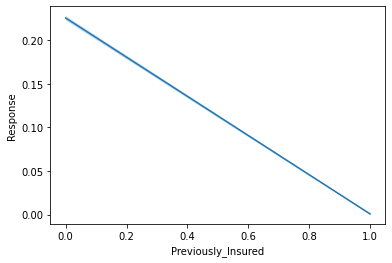

In [118]:
sns.lineplot(x=full_df.Previously_Insured, y=full_df.Response)

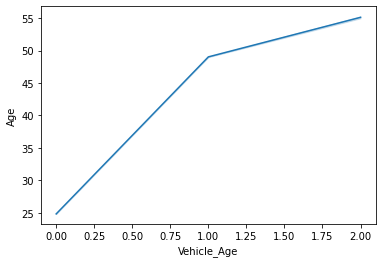

In [119]:
sns.lineplot(x=full_df.Vehicle_Age, y=full_df.Age)

In [120]:
full_df['Vintage_Weeks'] = full_df['Vintage'].apply(lambda days: days//7)
full_df['Vintage_Months'] = full_df['Vintage'].apply(lambda days: days//30)
full_df['Vehicle_Age - Vintage'] = abs(full_df['Vehicle_Age'] * 365 - full_df['Vintage'])
full_df['Annual_Premium'] = full_df['Annual_Premium']/540165.0

In [121]:
# COMBINED COLUMNS

from itertools import combinations

for x,y in combinations(categorical_columns, 2):
  full_df[f'{x} + {y}'] = full_df[x].astype(str) + ' ' + full_df[y].astype(str)
  full_df[f'{x} + {y}'] = LabelEncoder().fit_transform(full_df[f'{x} + {y}'])

for x,y,z in combinations(categorical_columns, 3):
  full_df[f'{x} + {y} + {z}'] = full_df[x].astype(str) + ' ' + full_df[y].astype(str) + ' ' + full_df[z].astype(str)
  full_df[f'{x} + {y} + {z}'] = LabelEncoder().fit_transform(full_df[f'{x} + {y} + {z}'])

for w,x,y,z in combinations(categorical_columns, 4):
  full_df[f'{w} + {x} + {y} + {z}'] = full_df[w].astype(str) + ' ' + full_df[x].astype(str) + ' ' + full_df[y].astype(str) + ' ' + full_df[z].astype(str)
  full_df[f'{w} + {x} + {y} + {z}'] = LabelEncoder().fit_transform(full_df[f'{w} + {x} + {y} + {z}'])

In [122]:
# PREVIOUSLY INSURED
aggr = full_df.groupby('Previously_Insured').agg(
    {
      'Annual_Premium' : ['max', 'mean', 'min', 'sum'],
      'Age' : ['max', 'min', 'count'],
      'Region_Code' : ['count', 'nunique'],
      'Policy_Sales_Channel' : ['count', 'nunique'],
      'Vintage' : ['sum', 'max', 'min'],
      'Vehicle_Damage' : ['nunique', 'count']
    }
)

aggr.columns = ['_'.join(x) for x in aggr.columns]
aggr.columns = ['Previously_Insured_' + column for column in aggr.columns]

full_df = pd.merge(full_df, aggr, on=['Previously_Insured'], how='left')

# VEHICLE DAMAGE
aggr = full_df.groupby('Vehicle_Damage').agg(
    {
      'Annual_Premium' : ['max', 'mean', 'min', 'sum'],
      'Age' : ['max', 'min', 'count'],
      'Vehicle_Age' : ['nunique', 'count'],
      'Region_Code' : ['count', 'nunique'],
      'Policy_Sales_Channel' : ['count', 'nunique'],
      'Vintage' : ['sum', 'max', 'min'],
      'Previously_Insured' : ['count', 'nunique']
    }
)

aggr.columns = ['_'.join(x) for x in aggr.columns]
aggr.columns = ['Vehicle_Damage_' + column for column in aggr.columns]

full_df = pd.merge(full_df, aggr, on=['Vehicle_Damage'], how='left')

# VEHICLE AGE
aggr = full_df.groupby('Vehicle_Age').agg(
    {
      'Annual_Premium' : ['max', 'mean', 'min', 'sum'],
      'Age' : ['max', 'min', 'count'],
      'Vehicle_Damage' : ['nunique', 'count'],
      'Region_Code' : ['count', 'nunique'],
      'Policy_Sales_Channel' : ['count', 'nunique'],
      'Vintage' : ['sum', 'max', 'min'],
      'Previously_Insured' : ['count', 'nunique']
    }
)

aggr.columns = ['_'.join(x) for x in aggr.columns]
aggr.columns = ['Vehicle_Age_' + column for column in aggr.columns]

full_df = pd.merge(full_df, aggr, on=['Vehicle_Age'], how='left')

# REGION CODE
aggr = full_df.groupby('Region_Code').agg(
    {
      'Annual_Premium' : ['max', 'mean', 'min', 'sum'],
      'Age' : ['max', 'min', 'count'],
      'Vehicle_Damage' : ['nunique', 'count'],
      'Vehicle_Age' : ['nunique', 'count'],
      'Policy_Sales_Channel' : ['count', 'nunique'],
      'Vintage' : ['sum', 'max', 'min'],
      'Previously_Insured' : ['count', 'nunique']
    }
)

aggr.columns = ['_'.join(x) for x in aggr.columns]
aggr.columns = ['Region_Code_' + column for column in aggr.columns]

full_df = pd.merge(full_df, aggr, on=['Region_Code'], how='left')

In [123]:
# # PREVIOUSLY INSURED VEHICLE DAMAGE
# aggr = full_df.groupby(['Previously_Insured', 'Vehicle_Damage']).agg(
#     {
#       'Annual_Premium' : ['max', 'mean', 'min', 'sum'],
#       'Age' : ['max', 'min', 'count'],
#       'Region_Code' : ['count', 'nunique'],
#       'Policy_Sales_Channel' : ['count', 'nunique'],
#       'Vintage' : ['sum', 'max', 'min'],
#       # 'Vehicle_Damage' : ['nunique', 'count']
#     }
# )

# aggr.columns = ['_'.join(x) for x in aggr.columns]
# aggr.columns = ['Previously_Insured_Vehicle_Damage_' + column for column in aggr.columns]

# full_df = pd.merge(full_df, aggr, on=['Previously_Insured', 'Vehicle_Damage'], how='left')

In [124]:
full_df['Vintage'] = full_df['Vintage']/365

In [125]:
full_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Bins,Vintage_Weeks,Vintage_Months,Vehicle_Age - Vintage,Gender + Driving_License,Gender + Region_Code,Gender + Previously_Insured,Gender + Vehicle_Age,Gender + Vehicle_Damage,Gender + Policy_Sales_Channel,Driving_License + Region_Code,Driving_License + Previously_Insured,Driving_License + Vehicle_Age,Driving_License + Vehicle_Damage,Driving_License + Policy_Sales_Channel,Region_Code + Previously_Insured,Region_Code + Vehicle_Age,Region_Code + Vehicle_Damage,Region_Code + Policy_Sales_Channel,Previously_Insured + Vehicle_Age,Previously_Insured + Vehicle_Damage,Previously_Insured + Policy_Sales_Channel,Vehicle_Age + Vehicle_Damage,Vehicle_Age + Policy_Sales_Channel,Vehicle_Damage + Policy_Sales_Channel,Gender + Driving_License + Region_Code,Gender + Driving_License + Previously_Insured,Gender + Driving_License + Vehicle_Age,...,Vehicle_Damage_Vintage_max,Vehicle_Damage_Vintage_min,Vehicle_Damage_Previously_Insured_count,Vehicle_Damage_Previously_Insured_nunique,Vehicle_Age_Annual_Premium_max,Vehicle_Age_Annual_Premium_mean,Vehicle_Age_Annual_Premium_min,Vehicle_Age_Annual_Premium_sum,Vehicle_Age_Age_max,Vehicle_Age_Age_min,Vehicle_Age_Age_count,Vehicle_Age_Vehicle_Damage_nunique,Vehicle_Age_Vehicle_Damage_count,Vehicle_Age_Region_Code_count,Vehicle_Age_Region_Code_nunique,Vehicle_Age_Policy_Sales_Channel_count,Vehicle_Age_Policy_Sales_Channel_nunique,Vehicle_Age_Vintage_sum,Vehicle_Age_Vintage_max,Vehicle_Age_Vintage_min,Vehicle_Age_Previously_Insured_count,Vehicle_Age_Previously_Insured_nunique,Region_Code_Annual_Premium_max,Region_Code_Annual_Premium_mean,Region_Code_Annual_Premium_min,Region_Code_Annual_Premium_sum,Region_Code_Age_max,Region_Code_Age_min,Region_Code_Age_count,Region_Code_Vehicle_Damage_nunique,Region_Code_Vehicle_Damage_count,Region_Code_Vehicle_Age_nunique,Region_Code_Vehicle_Age_count,Region_Code_Policy_Sales_Channel_count,Region_Code_Policy_Sales_Channel_nunique,Region_Code_Vintage_sum,Region_Code_Vintage_max,Region_Code_Vintage_min,Region_Code_Previously_Insured_count,Region_Code_Previously_Insured_nunique
0,1,1,44,1,28,0,2,1,0.074892,26,0.594521,1.0,1,31,7,513,3,74,2,5,3,211,71,2,5,3,126,42,65,43,921,2,1,71,5,267,213,165,6,11,...,299,10,256248,2,0.829665,0.065941,0.004869,1406.262474,83,20,21326,2,21326,21326,53,21326,107,3300001,299,10,21326,2,1.000000,0.071552,0.004869,10155.874301,85,20,141937,2,141937,3,141937,141937,120,21896141,299,10,141937,2
1,2,1,76,1,3,0,1,0,0.062085,26,0.501370,0.0,2,26,6,182,3,76,2,4,2,211,73,2,4,2,126,46,70,46,1084,1,0,71,2,139,72,167,6,10,...,299,10,251898,2,1.000000,0.056492,0.004869,15084.295180,85,20,267015,2,267015,267015,53,267015,143,41172005,299,10,267015,2,0.786015,0.045293,0.004869,559.317584,82,20,12349,2,12349,3,12349,12349,64,1912421,299,10,12349,2
2,3,1,47,1,28,0,2,1,0.070893,26,0.073973,1.0,1,3,0,703,3,74,2,5,3,211,71,2,5,3,126,42,65,43,921,2,1,71,5,267,213,165,6,11,...,299,10,256248,2,0.829665,0.065941,0.004869,1406.262474,83,20,21326,2,21326,21326,53,21326,107,3300001,299,10,21326,2,1.000000,0.071552,0.004869,10155.874301,85,20,141937,2,141937,3,141937,141937,120,21896141,299,10,141937,2
3,4,1,21,1,11,1,0,0,0.052982,152,0.556164,0.0,0,29,6,203,3,56,3,3,2,190,53,3,3,2,105,7,9,6,163,3,2,194,0,29,52,147,7,9,...,299,10,251898,2,1.000000,0.055744,0.004869,12252.739478,80,20,219805,2,219805,219805,53,219805,67,33955310,299,10,219805,2,0.358478,0.051198,0.004869,631.164733,82,20,12328,2,12328,3,12328,12328,53,1904927,299,10,12328,2
4,5,0,29,1,41,1,0,0,0.050903,152,0.106849,0.0,0,5,1,39,1,36,1,0,0,50,86,3,3,2,105,73,108,72,1666,3,2,194,0,29,52,78,3,3,...,299,10,251898,2,1.000000,0.055744,0.004869,12252.739478,80,20,219805,2,219805,219805,53,219805,67,33955310,299,10,219805,2,0.628319,0.057295,0.004869,1398.008220,83,20,24400,2,24400,3,24400,24400,68,3778369,299,10,24400,2
...,...,...,...,...,...,...,...,...,...,...,...,...

#*MAKING X AND Y*

In [126]:
train_df = full_df[full_df.Response.notnull()]
test_df = full_df[full_df.Response.isnull()]

In [127]:
X = train_df.drop(['id', 'Response'], axis=1)
y = train_df[target].astype(int)

In [128]:
full_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel',
       ...
       'Region_Code_Vehicle_Damage_count', 'Region_Code_Vehicle_Age_nunique',
       'Region_Code_Vehicle_Age_count',
       'Region_Code_Policy_Sales_Channel_count',
       'Region_Code_Policy_Sales_Channel_nunique', 'Region_Code_Vintage_sum',
       'Region_Code_Vintage_max', 'Region_Code_Vintage_min',
       'Region_Code_Previously_Insured_count',
       'Region_Code_Previously_Insured_nunique'],
      dtype='object', length=177)

#*MODEL TRAINING AND TUNING*

In [ ]:
[col for col in full_df.columns if '+' in col]

In [ ]:
from sklearn.metrics import log_loss

fold = StratifiedKFold(5, shuffle=True, random_state=110212)
fold.get_n_splits(X,y)

categorical_columns = ['Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

predictions_cat = []
accuracies_cat = []

predictions_xgb = []
accuracies_xgb = []

predictions_lgbm = []
accuracies_lgbm = []

predictions = []
accuracies=[]

i = 1

for train_index, test_index in fold.split(X, y):
  X_train, y_train = X.iloc[train_index], y.iloc[train_index]
  X_test, y_test = X.iloc[test_index], y.iloc[test_index]

  print(f'Fold {i}:\n')


  # LGBM

  dropped_columns_lgbm = []

  model_lgbm = LGBMClassifier(n_estimators=1000)
  model_lgbm.fit(X_train.drop(dropped_columns_lgbm, axis=1), y_train, eval_metric='auc',
            eval_set=(X_test.drop(dropped_columns_lgbm, axis=1), y_test),verbose=30,early_stopping_rounds=100,categorical_feature=categorical_columns)
  
  label_lgbm = model_lgbm.predict_proba(X_test.drop(dropped_columns_lgbm, axis=1))[:,1]
  score = roc_auc_score(y_test.values, model_lgbm.predict_proba(X_test.drop(dropped_columns_lgbm, axis=1))[:,1])
  print(f'\nLGBM Score: {score}\n')
  accuracies_lgbm.append(score)
  prediction_lgbm = pd.DataFrame(data=model_lgbm.predict_proba(test_df[X_train.drop(dropped_columns_lgbm, axis=1).columns])[:,1], index=test_df.id, columns=['Response'])
  predictions_lgbm.append(prediction_lgbm)

  # XGBOOST

  dropped_columns_xgb = ['Gender', 'Driving_License', 'Vehicle_Damage', 'Age_Bins', 'Vehicle_Age',
       'Driving_License + Previously_Insured',
       'Previously_Insured_Annual_Premium_max',
       'Previously_Insured_Annual_Premium_mean',
       'Previously_Insured_Annual_Premium_min',
       'Previously_Insured_Annual_Premium_sum', 'Previously_Insured_Age_max',
       'Previously_Insured_Age_min', 'Previously_Insured_Age_count',
       'Previously_Insured_Region_Code_count',
       'Previously_Insured_Region_Code_nunique',
       'Previously_Insured_Policy_Sales_Channel_count',
       'Previously_Insured_Policy_Sales_Channel_nunique',
       'Previously_Insured_Vintage_sum', 'Previously_Insured_Vintage_max',
       'Previously_Insured_Vintage_min', 'Vehicle_Damage_Annual_Premium_max',
       'Vehicle_Damage_Annual_Premium_mean',
       'Vehicle_Damage_Annual_Premium_min',
       'Vehicle_Damage_Annual_Premium_sum', 'Vehicle_Damage_Age_max',
       'Vehicle_Damage_Age_min', 'Vehicle_Damage_Age_count',
       'Vehicle_Damage_Region_Code_count',
       'Vehicle_Damage_Region_Code_nunique',
       'Vehicle_Damage_Policy_Sales_Channel_count',
       'Vehicle_Damage_Policy_Sales_Channel_nunique',
       'Vehicle_Damage_Vintage_sum', 'Vehicle_Damage_Vintage_max',
       'Vehicle_Damage_Vintage_min', 'Vehicle_Age_Vintage_max', 'Region_Code_Annual_Premium_min',
       'Vehicle_Age_Vintage_min', 'Vehicle_Age_Previously_Insured_count',
       'Vehicle_Age_Previously_Insured_nunique', 'Vehicle_Age_Vintage_sum',
       'Gender + Driving_License + Previously_Insured',
       'Driving_License + Vehicle_Damage',
       'Region_Code_Vehicle_Damage_nunique', 'Gender + Vehicle_Damage',
       'Region_Code_Age_min', 'Region_Code_Previously_Insured_count',
       'Region_Code_Vehicle_Damage_count', 'Region_Code_Vehicle_Age_nunique',
       'Region_Code_Vehicle_Age_count',
       'Vehicle_Age_Policy_Sales_Channel_count',
       'Region_Code_Policy_Sales_Channel_count', 'Region_Code_Vintage_max',
       'Vehicle_Age_Policy_Sales_Channel_nunique', 'Vehicle_Age_Age_max',
       'Vehicle_Age_Region_Code_nunique', 'Vehicle_Age_Region_Code_count',
       'Gender + Driving_License + Vehicle_Age + Vehicle_Damage',
       'Gender + Driving_License + Previously_Insured + Vehicle_Damage',
       'Driving_License + Vehicle_Age + Vehicle_Damage',
       'Driving_License + Previously_Insured + Vehicle_Damage',
       'Driving_License + Previously_Insured + Vehicle_Age',
       'Gender + Previously_Insured + Vehicle_Damage',
       'Gender + Driving_License + Vehicle_Damage',
       'Previously_Insured_Vehicle_Damage_nunique',
       'Previously_Insured_Vehicle_Damage_count',
       'Vehicle_Damage_Vehicle_Age_nunique',
       'Vehicle_Damage_Vehicle_Age_count',
       'Vehicle_Damage_Previously_Insured_count',
       'Vehicle_Damage_Previously_Insured_nunique',
       'Vehicle_Age_Annual_Premium_max', 'Vehicle_Age_Annual_Premium_mean',
       'Vehicle_Age_Annual_Premium_min',
       'Gender + Driving_License + Vehicle_Age', 'Vehicle_Age_Age_min',
       'Vehicle_Age_Age_count', 'Vehicle_Age_Vehicle_Damage_nunique',
       'Vehicle_Age_Vehicle_Damage_count',
       'Region_Code_Previously_Insured_nunique']

  model_xgb = XGBClassifier(n_estimators=10000, tree_method='gpu_hist', eval_metric='auc')
  model_xgb.fit(X_train.drop(dropped_columns_xgb, axis=1), y_train,
                eval_set = [(X_test.drop(dropped_columns_xgb, axis=1), y_test)],
                early_stopping_rounds=500,
                verbose=300,
                )
  label_xgb = model_xgb.predict_proba(X_test.drop(dropped_columns_xgb, axis=1))[:,1]
  score = roc_auc_score(y_test, model_xgb.predict_proba(X_test.drop(dropped_columns_xgb, axis=1))[:,1])
  print(f'XGBoost Score: {score}')
  print()
  prediction_xgb = pd.DataFrame(data = model_xgb.predict_proba(test_df[X_train.drop(dropped_columns_xgb, axis=1).columns])[:,1], columns=['Response'], index=test_df.id)
  predictions_xgb.append(prediction_xgb)
  accuracies_xgb.append(score)

  # CATBOOST

  dropped_columns_cat = []

  model_cat = CatBoostClassifier(iterations=10000, task_type='GPU', eval_metric='AUC', od_type='Iter')
  model_cat.fit(X_train.drop(dropped_columns_cat, axis=1), y_train,
                eval_set = (X_test.drop(dropped_columns_cat, axis=1), y_test),
                early_stopping_rounds=500,
                verbose=300,
                cat_features=categorical_columns + 
                ['Age_Bins', 'Vehicle_Damage', 'Gender', 'Driving_License'] + 
                ['Gender + Driving_License', 'Gender + Region_Code',
                'Gender + Previously_Insured', 'Gender + Vehicle_Age',
                'Gender + Vehicle_Damage', 'Gender + Policy_Sales_Channel',
                'Driving_License + Region_Code', 'Driving_License + Previously_Insured',
                'Driving_License + Vehicle_Age', 'Driving_License + Vehicle_Damage',
                'Driving_License + Policy_Sales_Channel',
                'Region_Code + Previously_Insured', 'Region_Code + Vehicle_Age',
                'Region_Code + Vehicle_Damage', 'Region_Code + Policy_Sales_Channel',
                'Previously_Insured + Vehicle_Age',
                'Previously_Insured + Vehicle_Damage',
                'Previously_Insured + Policy_Sales_Channel',
                'Vehicle_Age + Vehicle_Damage', 'Vehicle_Age + Policy_Sales_Channel',
                'Vehicle_Damage + Policy_Sales_Channel']
                )
  label_cat = model_cat.predict_proba(X_test.drop(dropped_columns_cat, axis=1))[:,1]
  score = roc_auc_score(y_test, model_cat.predict_proba(X_test.drop(dropped_columns_cat, axis=1))[:,1])
  print(f'\nCatBoost Score: {score}')
  print()
  prediction_cat = pd.DataFrame(data = model_cat.predict_proba(test_df[X_train.drop(dropped_columns_cat, axis=1).columns])[:,1], columns=['Response'], index=test_df.id)
  predictions_cat.append(prediction_cat)
  accuracies_cat.append(score)

  # ENSEMBLE

  weights = {'xgb' : 0.4, 'lgbm' : 0.4, 'cat' : 0.2}

  mean_score = roc_auc_score(y_test, (label_xgb + label_cat + label_lgbm )/3)
  accuracies.append(mean_score)
  mean_prediction = sum([prediction_cat['Response'], prediction_xgb['Response'], prediction_lgbm['Response']])/3
  mean_prediction = pd.DataFrame(data = mean_prediction, columns=['Response'], index=test_df.id)
  predictions.append(mean_prediction)
  print(f'\nMean Score: {mean_score}')
  print('--'*60)

  i += 1

print()
print(f'Mean: {np.mean(accuracies)}')
print(f'Max: {max(accuracies)}')
print(f'Min: {min(accuracies)}')

In [ ]:
print(f'Mean: {np.mean(accuracies)}')
print(f'Max: {max(accuracies)}')
print(f'Min: {min(accuracies)}')

Mean: 0.8591041661106615
Max: 0.8612427243098255
Min: 0.8577919043774116


In [ ]:
imp_lgbm = pd.DataFrame(data = model_lgbm.feature_importances_, index = X_train.drop(dropped_columns_lgbm, axis=1).columns)
dropped_columns_lgbm = imp_lgbm[imp_lgbm[0] == 0].index

In [ ]:
imp_cat = pd.DataFrame(model_cat.feature_importances_, index=X_train.drop(dropped_columns_cat, axis=1).columns).sort_values(0, ascending=False)
imp_cat[imp_cat[0] == 0.0].index

Index(['Region_Code_Age_min', 'Vehicle_Age_Vehicle_Damage_nunique',
       'Region_Code_Policy_Sales_Channel_nunique',
       'Vehicle_Damage_Vintage_min',
       'Vehicle_Damage_Previously_Insured_nunique',
       'Vehicle_Age_Annual_Premium_max', 'Vehicle_Age_Annual_Premium_mean',
       'Vehicle_Age_Annual_Premium_min', 'Region_Code_Vehicle_Age_nunique',
       'Vehicle_Age_Annual_Premium_sum', 'Vehicle_Age_Age_max',
       'Region_Code_Vintage_max', 'Vehicle_Age_Age_min',
       'Vehicle_Age_Age_count', 'Vehicle_Age_Vehicle_Damage_count',
       'Region_Code_Vehicle_Age_count', 'Vehicle_Age_Region_Code_count',
       'Vehicle_Age_Region_Code_nunique',
       'Vehicle_Age_Policy_Sales_Channel_count', 'Region_Code_Vintage_min',
       'Region_Code_Vehicle_Damage_nunique',
       'Vehicle_Age_Policy_Sales_Channel_nunique', 'Vehicle_Age_Vintage_sum',
       'Vehicle_Age_Vintage_max', 'Region_Code_Annual_Premium_min',
       'Region_Code_Policy_Sales_Channel_count',
       'Vehicle_Age_

In [ ]:
imp_xgb = pd.DataFrame(model_xgb.feature_importances_*100, index=X_train.drop(dropped_columns_xgb, axis=1).columns).sort_values(0, ascending=False)
imp_xgb[imp_xgb[0] == 0].index

Index(['Vehicle_Age_Vintage_max', 'Region_Code_Annual_Premium_min',
       'Vehicle_Age_Vintage_min', 'Vehicle_Age_Previously_Insured_count',
       'Vehicle_Age_Previously_Insured_nunique', 'Vehicle_Age_Vintage_sum',
       'Gender + Driving_License + Previously_Insured',
       'Driving_License + Vehicle_Damage',
       'Region_Code_Vehicle_Damage_nunique', 'Gender + Vehicle_Damage',
       'Region_Code_Age_min', 'Region_Code_Previously_Insured_count',
       'Region_Code_Vehicle_Damage_count', 'Region_Code_Vehicle_Age_nunique',
       'Region_Code_Vehicle_Age_count',
       'Vehicle_Age_Policy_Sales_Channel_count',
       'Region_Code_Policy_Sales_Channel_count', 'Region_Code_Vintage_max',
       'Vehicle_Age_Policy_Sales_Channel_nunique', 'Vehicle_Age_Age_max',
       'Vehicle_Age_Region_Code_nunique', 'Vehicle_Age_Region_Code_count',
       'Gender + Driving_License + Vehicle_Age + Vehicle_Damage',
       'Gender + Driving_License + Previously_Insured + Vehicle_Damage',
       'Dr

In [131]:
# submission = sum(predictions)/len(predictions)
# submission.to_csv('submission_ens.csv')

In [ ]:
# submission = sum(predictions_xgb)/len(predictions_xgb)
# submission.to_csv('submission_xgb.csv')

In [ ]:
lgbm = sum(predictions_lgbm)/len(predictions_lgbm)
cat = sum(predictions_cat)/len(predictions_cat)
xgb = sum(predictions_xgb)/len(predictions_xgb)

submission = lgbm*0.5 + xgb*0.5 + cat*0.0
submission.to_csv('submission_ens_weights.csv')